## Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read data

In [4]:
df_patients = pd.read_csv("../clean_data/patients.csv")
df_symptoms =pd.read_csv("../clean_data/mental_health_symptoms_clean.csv")
df_therapy =pd.read_csv("../clean_data/mental_health_therapy_clean.csv")
df_sleep_lifestyle = pd.read_csv("../clean_data/sleep_lifestyle_clean.csv")

In [8]:
df_patients
df_sleep_lifestyle
df_therapy
df_symptoms

,patient_id,age,gender,diagnosis,symptom_severity,mood_score,sleep_quality,physical_activity_(hrs/week),stress_level
0,1,43,Female,Major Depressive Disorder,10,5,8,5,9
1,2,40,Female,Major Depressive Disorder,9,5,4,7,7
2,3,55,Female,Major Depressive Disorder,6,3,4,3,7
3,4,34,Female,Major Depressive Disorder,6,3,6,5,8
4,5,52,Male,Panic Disorder,7,6,6,8,5
...,...,...,...,...,...,...,...,...,...
495,496,24,Male,Generalized Anxiety,10,4,8,6,9
496,497,22,Male,Panic Disorder,5,6,6,7,6
497,498,23,Male,Major Depressive Disorder,7,3,4,2,5
498,499,48,Male,Bipolar Disorder,9,4,6,9,6


### 1. Sleep quality average group by age → Sleep health and lifestyle + mental health symptoms

#### 1.1 average sleep quality and duration group by age in order descend by age

In [9]:
df_sleep_lifestyle

,patient_id,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,daily_steps,sleep_disorder
0,501,Male,27,Software Engineer,6.1,6,42,6,Overweight,4200,Nothing
1,502,Male,28,Doctor,6.2,6,60,8,Normal,10000,Nothing
2,503,Male,28,Doctor,6.2,6,60,8,Normal,10000,Nothing
3,504,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea
4,505,Male,28,Sales Representative,5.9,4,30,8,Obese,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
369,870,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea
370,871,Female,59,Nurse,8.0,9,75,3,Overweight,7000,Sleep Apnea
371,872,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea
372,873,Female,59,Nurse,8.1,9,75,3,Overweight,7000,Sleep Apnea


In [17]:
df_mean = df_sleep_lifestyle.groupby('age').agg(
    avg_sleep_quality = ('sleep_quality', 'mean'),
    avg_sleep_duration = ('sleep_duration', 'mean')
).reset_index().sort_values(by='age', ascending=False)
print(df_mean)

    age  avg_sleep_quality  avg_sleep_duration
30   59           9.000000            8.093750
29   58           9.000000            8.000000
28   57           9.000000            8.155556
27   56           9.000000            8.200000
26   55           9.000000            8.100000
25   54           9.000000            8.414286
24   53           9.000000            8.423529
23   52           7.666667            7.177778
22   51           7.625000            7.412500
21   50           6.150000            6.155000
20   49           6.545455            6.490909
19   48           6.666667            6.833333
18   45           7.000000            6.621429
17   44           6.400000            6.440000
16   43           7.088235            7.150000
15   42           7.333333            7.433333
14   41           7.833333            7.533333
13   40           8.000000            7.550000
12   39           7.866667            7.240000
11   38           7.950000            7.185000
10   37      

In [18]:
df_mean.columns

Index(['age', 'avg_sleep_quality', 'avg_sleep_duration'], dtype='object')

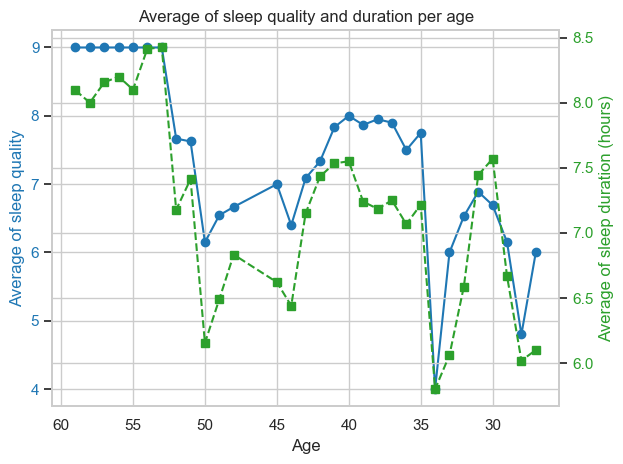

In [21]:
# Create plot
fig, ax1 = plt.subplots()

# Sleep quality
color = 'tab:blue'
ax1.set_xlabel('Age')
ax1.set_ylabel('Average of sleep quality', color=color)
ax1.plot(df_mean['age'], df_mean['avg_sleep_quality'], marker='o', color=color, label='Sleep quality')
ax1.tick_params(axis='y', labelcolor=color)
ax1.invert_xaxis()  # Invertir el eje X para que las edades estén en orden descendente

# Crear un segundo eje Y para duración del sueño
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average of sleep duration (hours)', color=color)
ax2.plot(df_mean['age'], df_mean['avg_sleep_duration'], marker='s', linestyle='--', color=color, label='Sleep duration')
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
plt.title('Average of sleep quality and duration per age')
fig.tight_layout()  # Ajustar el diseño para evitar solapamientos

# Mostrar el gráfico
plt.show()

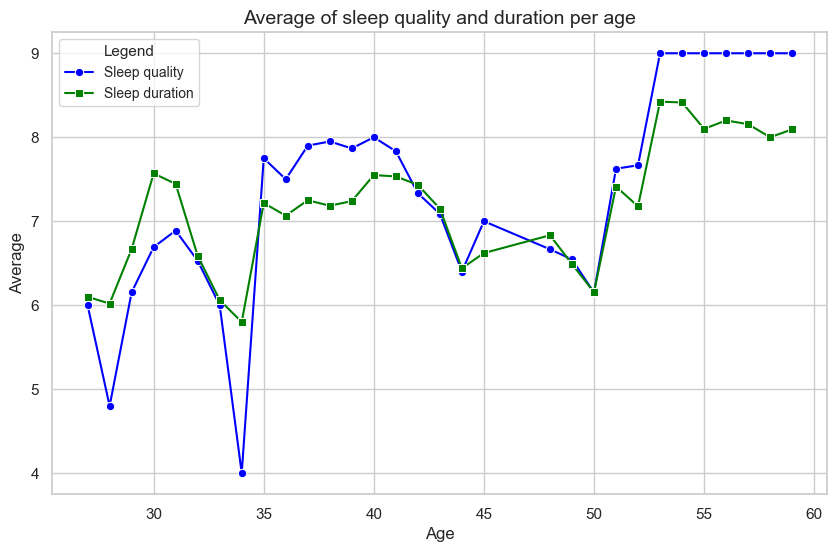

In [24]:

sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sleep quality
sns.lineplot(
    x='age', y='avg_sleep_quality', data=df_mean, 
    marker='o', color='blue', label='Sleep quality', ax=ax
)

# Sleep duration
sns.lineplot(
    x='age', y='avg_sleep_duration', data=df_mean, 
    marker='s', color='green', label='Sleep duration', ax=ax
)


ax.set_title('Average of sleep quality and duration per age', fontsize=14)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average', fontsize=12)
ax.legend(title='Legend', fontsize=10, title_fontsize=11)
#ax.invert_xaxis()  

# Mostrar gráfico
plt.show()

#### 1.2 TOP 10 AGES with the greatest average sleep duration

In [28]:
df_mean = df_sleep_lifestyle.groupby('age').agg(
    avg_sleep_quality = ('sleep_quality', 'mean'),
    avg_sleep_duration = ('sleep_duration', 'mean')
).reset_index().sort_values(by='avg_sleep_duration', ascending=False)
print(df_mean)
df_10 = df_mean.head(10)
print(df_10)

    age  avg_sleep_quality  avg_sleep_duration
24   53           9.000000            8.423529
25   54           9.000000            8.414286
27   56           9.000000            8.200000
28   57           9.000000            8.155556
26   55           9.000000            8.100000
30   59           9.000000            8.093750
29   58           9.000000            8.000000
3    30           6.692308            7.569231
13   40           8.000000            7.550000
14   41           7.833333            7.533333
4    31           6.888889            7.444444
15   42           7.333333            7.433333
22   51           7.625000            7.412500
10   37           7.900000            7.250000
12   39           7.866667            7.240000
8    35           7.750000            7.216667
11   38           7.950000            7.185000
23   52           7.666667            7.177778
16   43           7.088235            7.150000
9    36           7.500000            7.066667
19   48      

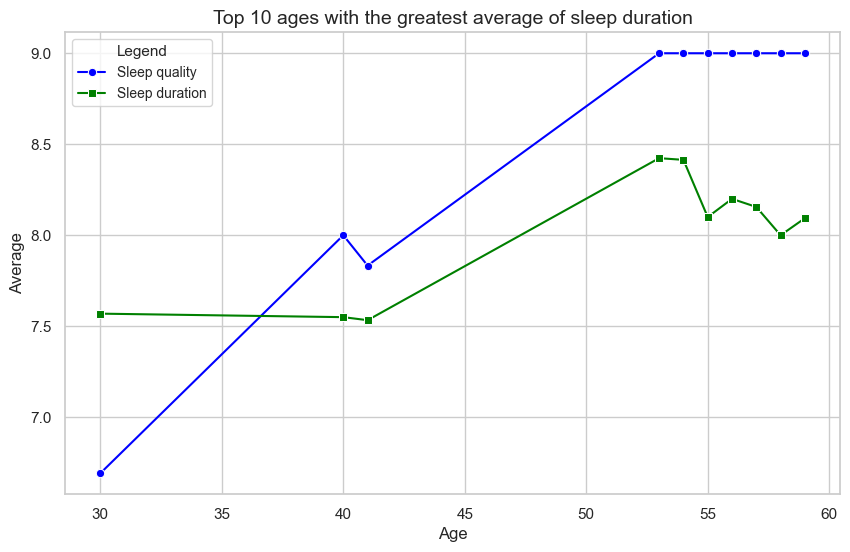

In [29]:
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sleep quality
sns.lineplot(
    x='age', y='avg_sleep_quality', data=df_10, 
    marker='o', color='blue', label='Sleep quality', ax=ax
)

# Sleep duration
sns.lineplot(
    x='age', y='avg_sleep_duration', data=df_10, 
    marker='s', color='green', label='Sleep duration', ax=ax
)


ax.set_title('Top 10 ages with the greatest average of sleep duration', fontsize=14)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average', fontsize=12)
ax.legend(title='Legend', fontsize=10, title_fontsize=11)
#ax.invert_xaxis()  

# Mostrar gráfico
plt.show()

#### 1.3 TOP 10 AGES with the lowest average sleep quality

In [30]:
df_mean = df_sleep_lifestyle.groupby('age').agg(
    avg_sleep_quality = ('sleep_quality', 'mean'),
    avg_sleep_duration = ('sleep_duration', 'mean')
).reset_index().sort_values(by='avg_sleep_quality', ascending=True)
print(df_mean)
df_10 = df_mean.head(10)
print(df_10)

    age  avg_sleep_quality  avg_sleep_duration
7    34           4.000000            5.800000
1    28           4.800000            6.020000
6    33           6.000000            6.061538
0    27           6.000000            6.100000
21   50           6.150000            6.155000
2    29           6.153846            6.669231
17   44           6.400000            6.440000
5    32           6.529412            6.588235
20   49           6.545455            6.490909
19   48           6.666667            6.833333
3    30           6.692308            7.569231
4    31           6.888889            7.444444
18   45           7.000000            6.621429
16   43           7.088235            7.150000
15   42           7.333333            7.433333
9    36           7.500000            7.066667
22   51           7.625000            7.412500
23   52           7.666667            7.177778
8    35           7.750000            7.216667
14   41           7.833333            7.533333
12   39      

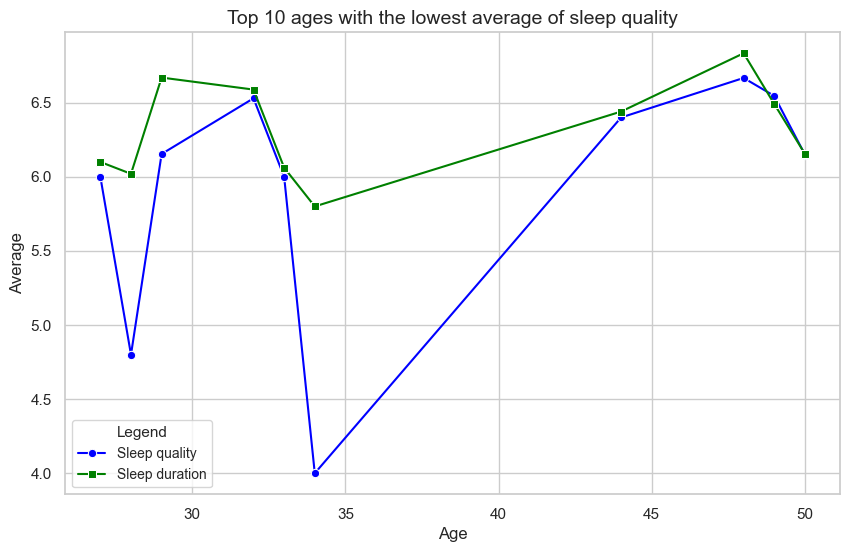

In [32]:
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sleep quality
sns.lineplot(
    x='age', y='avg_sleep_quality', data=df_10, 
    marker='o', color='blue', label='Sleep quality', ax=ax
)

# Sleep duration
sns.lineplot(
    x='age', y='avg_sleep_duration', data=df_10, 
    marker='s', color='green', label='Sleep duration', ax=ax
)


ax.set_title('Top 10 ages with the lowest average of sleep quality', fontsize=14)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average', fontsize=12)
ax.legend(title='Legend', fontsize=10, title_fontsize=11)
#ax.invert_xaxis()  

# Mostrar gráfico
plt.show()

#### 1.4 TOP 10 AGES with the quality lower that 7

In [35]:
df_mean = df_sleep_lifestyle.groupby('age').agg(
    avg_sleep_quality = ('sleep_quality', 'mean'),
    avg_sleep_duration = ('sleep_duration', 'mean')
).reset_index().sort_values(by='avg_sleep_quality', ascending=True)
print(df_mean)

df_7 = df_mean[df_mean['avg_sleep_quality'] <7]
df_7['age'].value_counts()

    age  avg_sleep_quality  avg_sleep_duration
7    34           4.000000            5.800000
1    28           4.800000            6.020000
6    33           6.000000            6.061538
0    27           6.000000            6.100000
21   50           6.150000            6.155000
2    29           6.153846            6.669231
17   44           6.400000            6.440000
5    32           6.529412            6.588235
20   49           6.545455            6.490909
19   48           6.666667            6.833333
3    30           6.692308            7.569231
4    31           6.888889            7.444444
18   45           7.000000            6.621429
16   43           7.088235            7.150000
15   42           7.333333            7.433333
9    36           7.500000            7.066667
22   51           7.625000            7.412500
23   52           7.666667            7.177778
8    35           7.750000            7.216667
14   41           7.833333            7.533333
12   39      

age
34    1
28    1
33    1
27    1
50    1
29    1
44    1
32    1
49    1
48    1
30    1
31    1
Name: count, dtype: int64

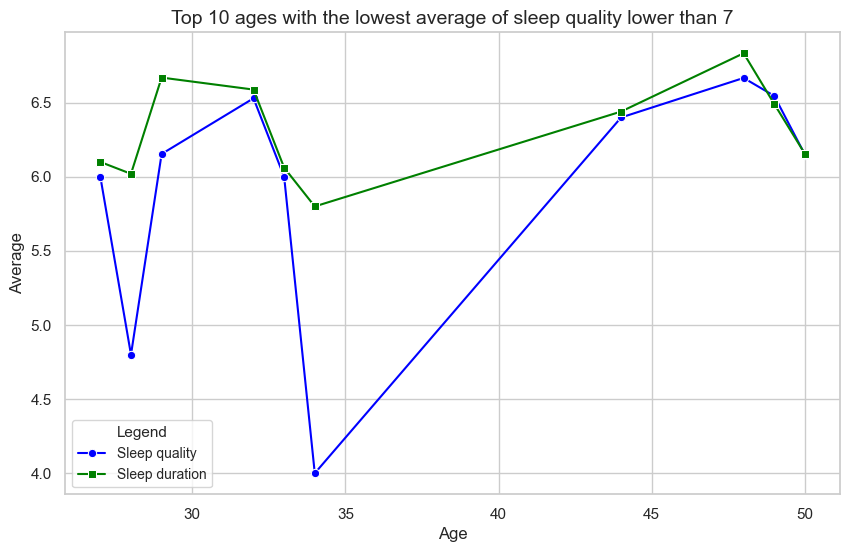

In [37]:
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Sleep quality
sns.lineplot(
    x='age', y='avg_sleep_quality', data=df_10, 
    marker='o', color='blue', label='Sleep quality', ax=ax
)

# Sleep duration
sns.lineplot(
    x='age', y='avg_sleep_duration', data=df_10, 
    marker='s', color='green', label='Sleep duration', ax=ax
)


ax.set_title('Top 10 ages with the lowest average of sleep quality lower than 7', fontsize=14)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Average', fontsize=12)
ax.legend(title='Legend', fontsize=10, title_fontsize=11)
#ax.invert_xaxis()  

# Mostrar gráfico
plt.show()

#### 1.5 Compare with symptoms

In [39]:
merge_df = pd.merge(df_patients, df_sleep_lifestyle, on='age')
merge_df = pd.merge(merge_df, df_symptoms, on="age")
merge_df

,patient_id_x,age,gender_x,patient_id_y,gender_y,occupation,sleep_duration,sleep_quality_x,physical_activity_level,stress_level_x,...,daily_steps,sleep_disorder,patient_id,gender,diagnosis,symptom_severity,mood_score,sleep_quality_y,physical_activity_(hrs/week),stress_level_y
0,1,43,Female,687,Female,Teacher,6.7,7,45,4,...,6000,Insomnia,1,Female,Major Depressive Disorder,10,5,8,5,9
1,1,43,Female,687,Female,Teacher,6.7,7,45,4,...,6000,Insomnia,46,Female,Bipolar Disorder,9,6,5,10,10
2,1,43,Female,687,Female,Teacher,6.7,7,45,4,...,6000,Insomnia,57,Male,Panic Disorder,8,4,5,8,6
3,1,43,Female,687,Female,Teacher,6.7,7,45,4,...,6000,Insomnia,92,Female,Bipolar Disorder,9,8,7,10,7
4,1,43,Female,687,Female,Teacher,6.7,7,45,4,...,6000,Insomnia,99,Female,Panic Disorder,6,5,8,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126541,874,59,Female,874,Female,Nurse,8.1,9,75,3,...,7000,Sleep Apnea,279,Female,Panic Disorder,6,5,7,5,6
126542,874,59,Female,874,Female,Nurse,8.1,9,75,3,...,7000,Sleep Apnea,402,Male,Panic Disorder,8,7,5,10,7
126543,874,59,Female,874,Female,Nurse,8.1,9,75,3,...,7000,Sleep Apnea,416,Male,Bipolar Disorder,8,7,5,5,9
126544,874,59,Female,874,Female,Nurse,8.1,9,75,3,...,7000,Sleep Apnea,445,Male,Major Depressive Disorder,6,7,9,9,6


In [41]:
merge_df.columns

Index(['patient_id_x', 'age', 'gender_x', 'patient_id_y', 'gender_y',
       'occupation', 'sleep_duration', 'sleep_quality_x',
       'physical_activity_level', 'stress_level_x', 'bmi_category',
       'daily_steps', 'sleep_disorder', 'patient_id', 'gender', 'diagnosis',
       'symptom_severity', 'mood_score', 'sleep_quality_y',
       'physical_activity_(hrs/week)', 'stress_level_y'],
      dtype='object')

In [55]:
df_grouped = merge_df.groupby(['age','gender','diagnosis']).agg(
    avg_sleep_quality = ('sleep_quality_x', 'mean'), 
    avg_sleep_duration = ('sleep_duration', 'mean')
).reset_index()
print(df_grouped)

     age  gender                  diagnosis  avg_sleep_quality  \
0     27  Female           Bipolar Disorder                6.0   
1     27  Female        Generalized Anxiety                6.0   
2     27  Female  Major Depressive Disorder                6.0   
3     27  Female             Panic Disorder                6.0   
4     27    Male           Bipolar Disorder                6.0   
..   ...     ...                        ...                ...   
177   59  Female             Panic Disorder                9.0   
178   59    Male           Bipolar Disorder                9.0   
179   59    Male        Generalized Anxiety                9.0   
180   59    Male  Major Depressive Disorder                9.0   
181   59    Male             Panic Disorder                9.0   

     avg_sleep_duration  
0               6.10000  
1               6.10000  
2               6.10000  
3               6.10000  
4               6.10000  
..                  ...  
177             8.09375  

In [56]:
filter_df = df_grouped[df_grouped['avg_sleep_quality'] <6]

In [57]:
filter_df

,age,gender,diagnosis,avg_sleep_quality,avg_sleep_duration
7,28,Female,Bipolar Disorder,4.8,6.02
8,28,Female,Generalized Anxiety,4.8,6.02
9,28,Female,Major Depressive Disorder,4.8,6.02
10,28,Female,Panic Disorder,4.8,6.02
11,28,Male,Bipolar Disorder,4.8,6.02
12,28,Male,Generalized Anxiety,4.8,6.02
13,28,Male,Major Depressive Disorder,4.8,6.02
14,28,Male,Panic Disorder,4.8,6.02
46,34,Female,Bipolar Disorder,4.0,5.80
47,34,Female,Major Depressive Disorder,4.0,5.80
